<a href="https://colab.research.google.com/github/Ankita26-sg/Assignment2/blob/main/Stats2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Packages imported!
Dataset loaded!
(180519, 53)

Columns:
['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', '

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Fraud Detection — LogisticRegression
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     35292
           1       0.08      0.74      0.14       812

    accuracy                           0.79     36104
   macro avg       0.53      0.77      0.51     36104
weighted avg       0.97      0.79      0.86     36104



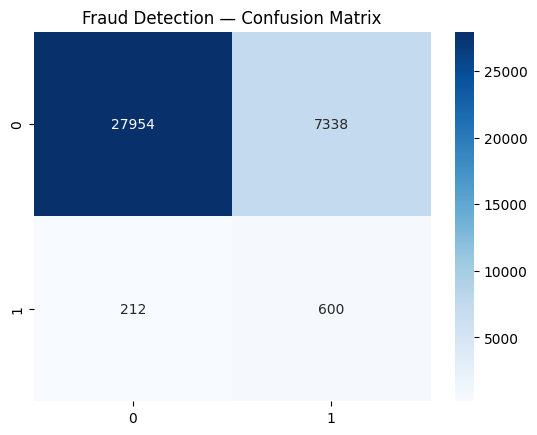


Fraud Detection — LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     35292
           1       0.08      0.87      0.15       812

    accuracy                           0.78     36104
   macro avg       0.54      0.82      0.51     36104
weighted avg       0.98      0.78      0.86     36104



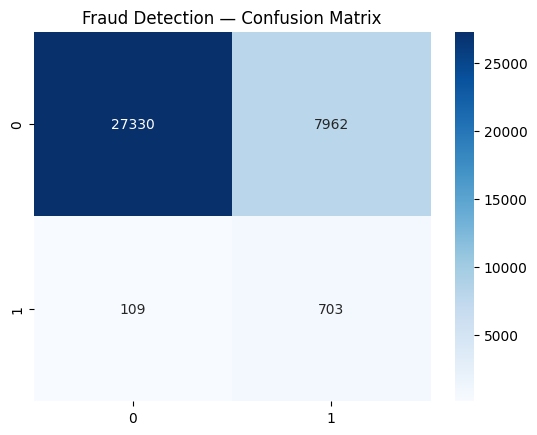


Fraud Detection — RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      0.87      0.92     35292
           1       0.08      0.52      0.14       812

    accuracy                           0.86     36104
   macro avg       0.54      0.70      0.53     36104
weighted avg       0.97      0.86      0.91     36104



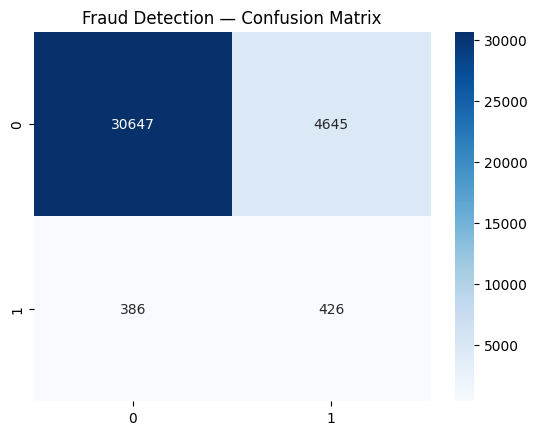


=== LATE DELIVERY MODELS ===


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Late Delivery — LogisticRegression
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     16308
           1       0.96      0.99      0.97     19796

    accuracy                           0.97     36104
   macro avg       0.97      0.97      0.97     36104
weighted avg       0.97      0.97      0.97     36104



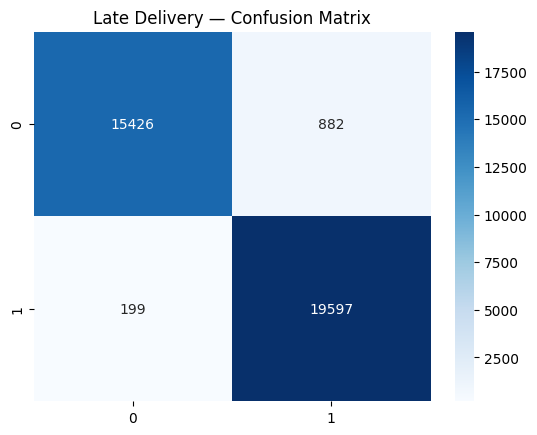


Late Delivery — LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     16308
           1       0.96      1.00      0.98     19796

    accuracy                           0.97     36104
   macro avg       0.98      0.97      0.97     36104
weighted avg       0.98      0.97      0.97     36104



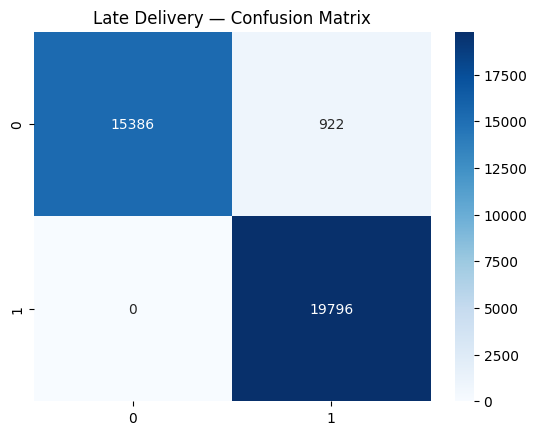


Late Delivery — RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     16308
           1       0.96      1.00      0.98     19796

    accuracy                           0.97     36104
   macro avg       0.98      0.97      0.97     36104
weighted avg       0.98      0.97      0.97     36104



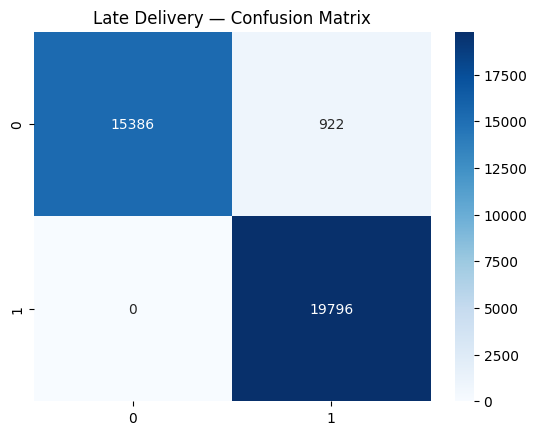


FINAL MODEL RESULTS:
                    Model  Accuracy    Recall  F1 Score           Target
0      LogisticRegression  0.790882  0.738916  0.137143  Fraud Detection
1      LogisticRegression  0.776451  0.865764  0.148359  Fraud Detection
2  RandomForestClassifier  0.860653  0.524631  0.144824  Fraud Detection
3      LogisticRegression  0.970059  0.989947  0.973160    Late Delivery
4      LogisticRegression  0.974463  1.000000  0.977242    Late Delivery
5  RandomForestClassifier  0.974463  1.000000  0.977242    Late Delivery


In [ ]:
!pip install imbalanced-learn

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

print("Packages imported!")

# ============================================
# STEP 1 — LOAD YOUR DATASET
# ============================================

df = pd.read_csv("/content/DataCoSupplyChainDataset.csv", encoding="latin1")
print("Dataset loaded!")
print(df.shape)

# ============================================
# STEP 2 — INSPECT COLUMNS
# ============================================

print("\nColumns:")
print(df.columns.tolist())

print("\nOrder Status values:", df['Order Status'].unique())
print("Delivery Status values:", df['Delivery Status'].unique())

# ============================================
# STEP 3 — CREATE TARGET VARIABLES
# ============================================

df['fraud'] = np.where(df['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
df['late_delivery'] = np.where(df['Delivery Status'] == 'Late delivery', 1, 0)

print("\nFraud cases:", df['fraud'].sum())
print("Late deliveries:", df['late_delivery'].sum())

# ============================================
# STEP 4 — FEATURE SELECTION
# ============================================

useful_features = [
    'Benefit per order', 'Sales per customer', 'Order Item Total',
    'Order Profit Per Order', 'Order Item Quantity', 'Order Item Discount',
    'Product Price', 'Order Item Product Price', 'Days for shipping (real)',
    'Days for shipment (scheduled)', 'Shipping Mode', 'Market', 'Order Region',
    'Order Country', 'Customer Country', 'Customer Segment', 'Category Name',
    'Department Name', 'Type', 'Order City', 'Order State'
]

existing_features = [f for f in useful_features if f in df.columns]

feature_columns = existing_features

print("\nFinal features:")
print(feature_columns)

# ============================================
# STEP 5 — DATA PREPARATION FUNCTION
# ============================================

def prepare(df, feature_columns, target, test_size=0.2):

    data = df[feature_columns + [target]].copy()

    # split categorical and numeric
    numeric_feats = data[feature_columns].select_dtypes(include=[np.number]).columns.tolist()
    categorical_feats = data[feature_columns].select_dtypes(include=['object']).columns.tolist()

    # encode categorical
    for c in categorical_feats:
        le = LabelEncoder()
        data[c] = le.fit_transform(data[c].astype(str))

    # fill missing values
    data[numeric_feats] = data[numeric_feats].fillna(data[numeric_feats].median())

    X = data[feature_columns]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # SMOTE
    sm = SMOTE(random_state=42)
    X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

    return X_train_bal, X_test, y_train_bal, y_test

# ============================================
# STEP 6 — PREPARE FRAUD & LATE DELIVERY DATASETS
# ============================================

print("\nPreparing FRAUD dataset...")
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = prepare(df, feature_columns, 'fraud')

print("\nPreparing LATE DELIVERY dataset...")
X_train_late, X_test_late, y_train_late, y_test_late = prepare(df, feature_columns, 'late_delivery')

# ============================================
# STEP 7 — MODEL EVALUATION FUNCTION
# ============================================

def evaluate(model, X_train, X_test, y_train, y_test, title):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{title} — {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{title} — Confusion Matrix")
    plt.show()

    return {
        "Model": model.__class__.__name__,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Target": title
    }

# ============================================
# STEP 8 — DEFINE MODELS
# ============================================

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "L1 Logistic Regression": LogisticRegression(
        penalty="l1", solver="liblinear", max_iter=1000, class_weight="balanced"
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=12, random_state=42, class_weight="balanced"
    )
}

# ============================================
# STEP 9 — RUN MODELS
# ============================================

fraud_results = []
late_results = []

print("\n=== FRAUD DETECTION MODELS ===")
for name, model in models.items():
    fraud_results.append(
        evaluate(model, X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud, "Fraud Detection")
    )

print("\n=== LATE DELIVERY MODELS ===")
for name, model in models.items():
    late_results.append(
        evaluate(model, X_train_late, X_test_late, y_train_late, y_test_late, "Late Delivery")
    )

results_df = pd.DataFrame(fraud_results + late_results)
print("\nFINAL MODEL RESULTS:")
print(results_df)

# ============================================
# STEP 10 — FEATURE IMPORTANCE
# ============================================

rf_fraud = RandomForestClassifier(n_estimators=200, class_weight="balanced")
rf_fraud.fit(X_train_fraud, y_train_fraud)

rf_late = RandomForestClassifier(n_estimators=200, class_weight="balanced")
rf_late.fit(X_train_late, y_train_late)

importance_fraud = pd.Series(rf_fraud.feature_importances_, index=feature_columns).sort_values(ascending=False)
importance_late = pd.Series(rf_late.feature_importances_, index=feature_columns).sort_values(ascending=False)

print("\nTop 5 Fraud Features:")
print(importance_fraud.head(5))

print("\nTop 5 Late Delivery Features:")
print(importance_late.head(5))

sns.barplot(x=importance_fraud.head(10), y=importance_fraud.head(10).index)
plt.title("Top Fraud Features")
plt.show()

sns.barplot(x=importance_late.head(10), y=importance_late.head(10).index)
plt.title("Top Late Delivery Features")
plt.show()

print("\n🎉 ASSIGNMENT COMPLETED SUCCESSFULLY!")
